In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import time,datetime
import gc
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#加载数据
train = pd.read_csv('./train.csv')
test = pd.read_csv("./test2.csv")
print(train.shape)
train.head()

(500000, 21)


,Unnamed: 0,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,label,lan,media_id,...,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,0,316361,1199,46000.0,0.0,0.0,0.0,1,NaN,104,...,android,9,18,1438873,1.559893e+12,8,2135019403,0,2329670524,601
1,1,135939,893,0.0,0.0,0.0,0.0,1,NaN,19,...,android,8.1,0,1185582,1.559994e+12,4,2782306428,1,2864801071,1000
2,2,399254,821,0.0,760.0,0.0,360.0,1,NaN,559,...,android,8.1.0,0,1555716,1.559837e+12,0,1392806005,2,628911675,696
3,3,68983,1004,46000.0,2214.0,0.0,1080.0,0,NaN,129,...,android,8.1.0,0,1093419,1.560042e+12,0,3562553457,3,1283809327,753
4,4,288999,1076,46000.0,2280.0,0.0,1080.0,1,zh-CN,64,...,android,8.0.0,0,1400089,1.559867e+12,5,2364522023,4,1510695983,582


In [3]:
#数据处理
train["origin"] = "train"
test["origin"] = "test"
submit = pd.DataFrame(test['sid'])
data = pd.concat([train,test])
print(data.shape)
data.head()

(650000, 22)


,Unnamed: 0,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,label,lan,media_id,...,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type,origin
0,0,316361,1199,46000.0,0.0,0.0,0.0,1.0,NaN,104,...,9,18,1438873,1.559893e+12,8,2135019403,0,2329670524,601,train
1,1,135939,893,0.0,0.0,0.0,0.0,1.0,NaN,19,...,8.1,0,1185582,1.559994e+12,4,2782306428,1,2864801071,1000,train
2,2,399254,821,0.0,760.0,0.0,360.0,1.0,NaN,559,...,8.1.0,0,1555716,1.559837e+12,0,1392806005,2,628911675,696,train
3,3,68983,1004,46000.0,2214.0,0.0,1080.0,0.0,NaN,129,...,8.1.0,0,1093419,1.560042e+12,0,3562553457,3,1283809327,753,train
4,4,288999,1076,46000.0,2280.0,0.0,1080.0,1.0,zh-CN,64,...,8.0.0,0,1400089,1.559867e+12,5,2364522023,4,1510695983,582,train


In [4]:
#样本采样
# data = train.groupby(["label"]).sample(frac=0.1)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


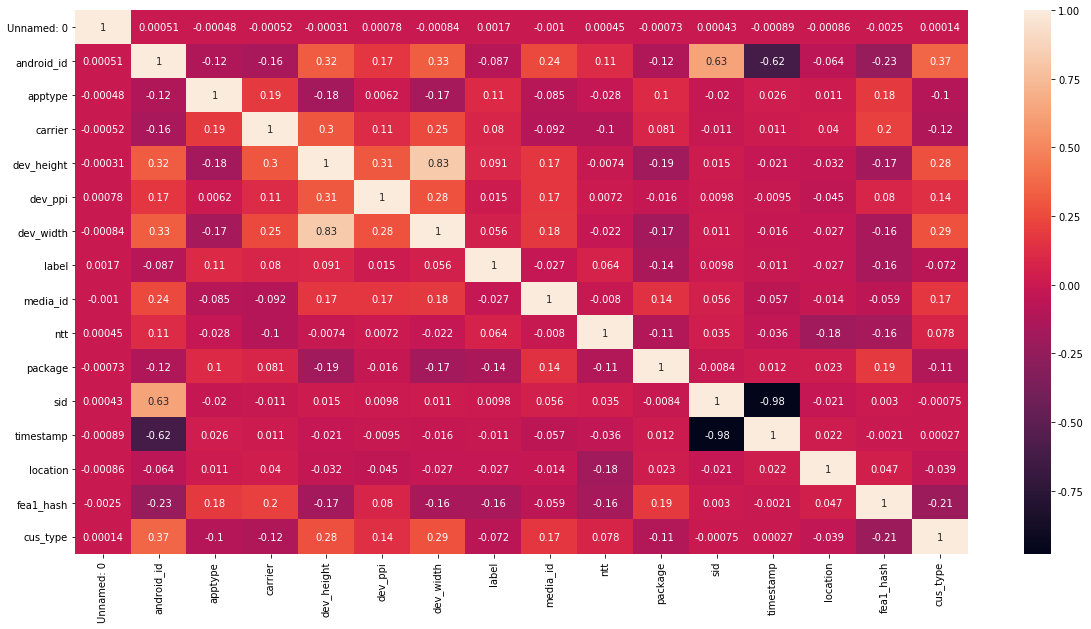

In [5]:
#热力图查看特征相关性
plt.figure(figsize =(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [6]:
#删除无关特征
data = data.drop(['Unnamed: 0','sid'],axis =1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   android_id  650000 non-null  int64  
 1   apptype     650000 non-null  int64  
 2   carrier     650000 non-null  float64
 3   dev_height  650000 non-null  float64
 4   dev_ppi     650000 non-null  float64
 5   dev_width   650000 non-null  float64
 6   label       500000 non-null  float64
 7   lan         411287 non-null  object 
 8   media_id    650000 non-null  int64  
 9   ntt         650000 non-null  float64
 10  os          650000 non-null  object 
 11  osv         641534 non-null  object 
 12  package     650000 non-null  int64  
 13  timestamp   650000 non-null  float64
 14  version     650000 non-null  object 
 15  fea_hash    650000 non-null  object 
 16  location    650000 non-null  int64  
 17  fea1_hash   650000 non-null  int64  
 18  cus_type    650000 non-null  int64  
 19  or

In [7]:
#数据探索
#标签
print(data['label'].value_counts())

0.0    257760
1.0    242240
Name: label, dtype: int64


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


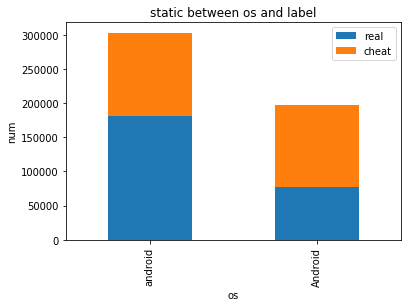

20693

In [8]:
#os字段
os_0 = data['os'][data['label']==0].value_counts()
os_1 = data['os'][data['label']==1].value_counts()
df_os = pd.DataFrame({'real':os_0,'cheat':os_1})
df_os.plot(kind='bar',stacked = True)
plt.title('static between os and label')
plt.xlabel('os')
plt.ylabel('num')
plt.show()
del os_0, os_1,df_os
gc.collect()

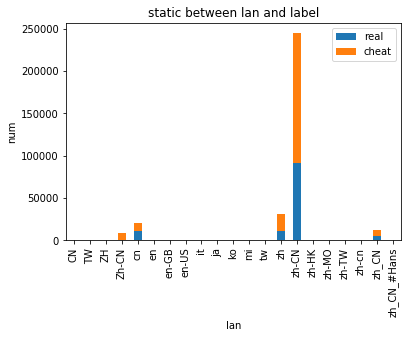

6103

In [9]:
#查看lan特征的取值分布
lan_0 = data['lan'][data['label']==0].value_counts()
lan_1 = data['lan'][data['label']==1].value_counts()
df_lan = pd.DataFrame({'real':lan_0,'cheat':lan_1})
df_lan.plot(kind='bar',stacked = True)
plt.title('static between lan and label')
plt.xlabel('lan')
plt.ylabel('num')
plt.show()
del lan_0, lan_1, df_lan
gc.collect()

In [10]:
#补全缺失值
data['lan'].fillna(value = 'zh-CN',inplace = True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   android_id  650000 non-null  int64  
 1   apptype     650000 non-null  int64  
 2   carrier     650000 non-null  float64
 3   dev_height  650000 non-null  float64
 4   dev_ppi     650000 non-null  float64
 5   dev_width   650000 non-null  float64
 6   label       500000 non-null  float64
 7   lan         650000 non-null  object 
 8   media_id    650000 non-null  int64  
 9   ntt         650000 non-null  float64
 10  os          650000 non-null  object 
 11  osv         641534 non-null  object 
 12  package     650000 non-null  int64  
 13  timestamp   650000 non-null  float64
 14  version     650000 non-null  object 
 15  fea_hash    650000 non-null  object 
 16  location    650000 non-null  int64  
 17  fea1_hash   650000 non-null  int64  
 18  cus_type    650000 non-null  int64  
 19  or

In [11]:
#osv
# print(data["osv"].value_counts())
data["osv"].fillna("8.1.0", inplace=True)
data.isnull().sum()

android_id         0
apptype            0
carrier            0
dev_height         0
dev_ppi            0
dev_width          0
label         150000
lan                0
media_id           0
ntt                0
os                 0
osv                0
package            0
timestamp          0
version            0
fea_hash           0
location           0
fea1_hash          0
cus_type           0
origin             0
dtype: int64

<Figure size 1440x576 with 0 Axes>

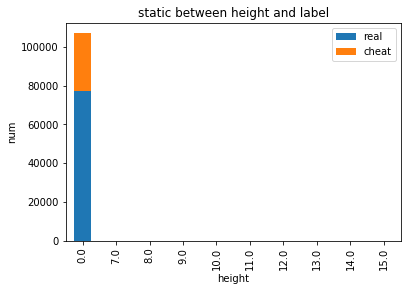

3956

In [12]:
#height
fig = plt.figure(figsize = (20,8))
fig.set(alpha = 0.2)
height_0 = data['dev_height'][data['label']==0].value_counts()
height_1 = data['dev_height'][data['label']==1].value_counts()
df_height = pd.DataFrame({'real':height_0,'cheat':height_1})
df_height.iloc[:10].plot(kind='bar',stacked = True,sort_columns = True)
plt.title('static between height and label')
plt.xlabel('height')
plt.ylabel('num')
plt.show()
del height_0, height_1, df_height
gc.collect()

In [13]:
#处理时间特征
date_parser = lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(int(x/1000)))
temp = data["timestamp"].apply(date_parser)
print(temp.max())
print(temp.min())

def add_time(temp):
    temp = pd.to_datetime(temp)
    data["day"] = temp.dt.day
    data["weekday"] = temp.dt.weekday
    data["hour"] = temp.dt.hour
    data["minute"] = temp.dt.minute
    data["second"] = temp.dt.second
    data.drop(["timestamp"], axis=1, inplace=True)
    
add_time(temp)
data.head()
del date_parser,temp
gc.collect()

2019-06-09 16:00:04
2019-06-02 16:00:01


30

In [14]:
#拆分训练数据
train = data[data["origin"] == "train"]
test = data[data["origin"] == "test"]

In [15]:
from sklearn.model_selection import cross_val_score,KFold
from catboost import CatBoostClassifier,Pool,cv
label = train['label']
features = train.drop(['label',"origin"],axis =1).astype("str")
seed = 9

X_train,X_valid,y_train,y_valid = train_test_split(features,label,test_size = 0.1,random_state = seed)

train_data = Pool(data = X_train,
                 label = y_train,
                 cat_features = features.columns)

model = CatBoostClassifier(depth =7,
                        bootstrap_type= 'Bernoulli',                                             
                        learning_rate = 0.08,
                        l2_leaf_reg=9,
                        iterations =1200,                         
                        rsm =0.8,
                        od_type = 'Iter',
                        od_wait =150,
                        metric_period =200,
                        thread_count = 10,
                        random_seed =seed,
                        one_hot_max_size =50,
                        eval_metric = 'Accuracy')

model.fit(train_data, eval_set=(X_valid,y_valid))

0:	learn: 0.8757644	test: 0.8790600	best: 0.8790600 (0)	total: 469ms	remaining: 9m 22s
200:	learn: 0.8913844	test: 0.8916800	best: 0.8918400 (188)	total: 1m 26s	remaining: 7m 9s
400:	learn: 0.8930489	test: 0.8922800	best: 0.8924600 (389)	total: 2m 54s	remaining: 5m 46s
600:	learn: 0.8941333	test: 0.8923200	best: 0.8925800 (570)	total: 4m 23s	remaining: 4m 22s
800:	learn: 0.8953311	test: 0.8925400	best: 0.8926200 (682)	total: 5m 54s	remaining: 2m 56s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.89262
bestIteration = 682

Shrink model to first 683 iterations.


In [16]:
#catboost测试
y_pred = model.predict(X_valid)
score = accuracy_score(y_valid,y_pred)
print(" CatBoostClassifier预测准确率",score)

 CatBoostClassifier预测准确率 0.89262


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


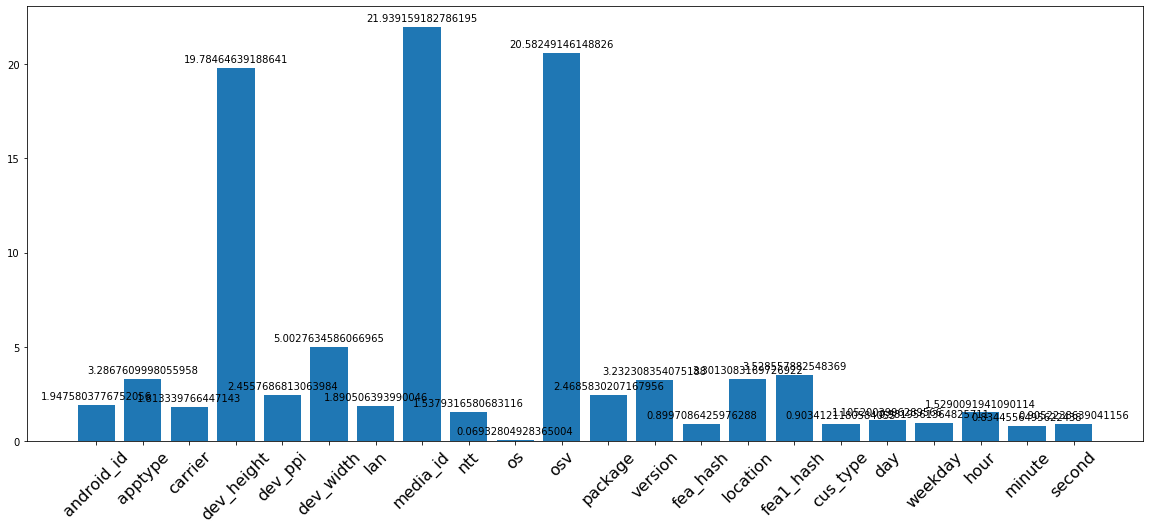

In [17]:
#查看特征重要性
plt.figure(figsize =(20,8))
rects = plt.bar(features.columns,model.feature_importances_)
plt.xticks(fontsize=16,rotation = 45)

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + 0.5*rect.get_width(),height+0.3,str(height),ha = 'center')
plt.show()

In [18]:
#预测概率值和准确率统计
CatBoostClassifier_pred = model.predict_proba(X_valid)
mix_valid = CatBoostClassifier_pred[:,1]
count =1

In [19]:
#测试集完成预测
test_pred = model.predict_proba(test[features.columns].astype("str"))
mix_test = test_pred[:,1]
del train, test, model, label, features, X_train,X_valid,y_train,y_valid,train_data,y_pred,score,rects,CatBoostClassifier_pred
gc.collect()

40

In [20]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

#LabelEncoder
lbe = LabelEncoder()
features = data.columns.to_list()
features.remove("origin")
features.remove("label")
for feature in features:    
    data[feature] = lbe.fit_transform(data[feature])

#拆分数据集
train = data[data["origin"] == "train"]
test = data[data["origin"] == "test"]

#切分数据集
label = train['label']
features = train.drop(['label', "origin"],axis =1)
X_train,X_valid,y_train,y_valid = train_test_split(features,label,test_size = 0.1,random_state = seed)

#数据规范化
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_valid = ss.transform(X_valid)
test = ss.transform(test[features.columns])
print(X_train.shape)
del data, train
gc.collect()

(450000, 22)


0

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

threshold = 0.8

model_names = [ "RandomForestClassifier", "DecisionTreeClassifier", "KNeighborsClassifier",
                "XGBClassifier", "LGBMClassifier"]
models = [ RandomForestClassifier(), DecisionTreeClassifier(),
           KNeighborsClassifier(), XGBClassifier(), LGBMClassifier()] 

for model_name,model in zip(model_names,models):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)    
    score = accuracy_score(y_valid,y_pred)  
    print("{}准确率为{}".format(model_name,score))
    valid_pred = model.predict_proba(X_valid)
    test_pred = model.predict_proba(test)
    if score > threshold:
        count +=1
        mix_valid = mix_valid + valid_pred[:,1]
        mix_test = mix_test + test_pred[:,1]

RandomForestClassifier准确率为0.88396
DecisionTreeClassifier准确率为0.82178
KNeighborsClassifier准确率为0.82298
XGBClassifier准确率为0.88744
LGBMClassifier准确率为0.88188


In [24]:
# 使用neural network模型
import sys
sys.path.append('E:\Program Files\python\Lib\site-packages')
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# BN,对每个batch数据前一层的激活值据进行batch normalization使输出数据均值为0，方差为1
keras.layers.BatchNormalization()
model = Sequential()
# 搭建神经网络
model.add(Dense(1024,activation = 'relu',input_dim = X_train.shape[1]))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
#模型编译
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])
#模型训练
callback = keras.callbacks.EarlyStopping(patience=1)
model.fit(X_train,y_train,batch_size = 1024,epochs = 10, validation_data=(X_valid,y_valid), callbacks=[callback])
#验证集预测
valid_pred = model.predict(X_valid,batch_size = 512,verbose =1)
#测试集预测
test_pred = model.predict(test, batch_size=512, verbose=1)
#模型评估
y_pred_class = np.where(valid_pred>=0.5,1,0)
score = accuracy_score(y_valid,y_pred_class)
print("nn准确率为",score) 
if score > threshold:
    mix_valid = mix_valid + valid_pred[:,0]
    mix_test = mix_test + test_pred[:,0]        

Epoch 1/10
440/440 [==============================] - 10s 24ms/step - loss: 0.4022 - accuracy: 0.8275 - val_loss: 0.3721 - val_accuracy: 0.8483
Epoch 2/10
440/440 [==============================] - 10s 24ms/step - loss: 0.3621 - accuracy: 0.8539 - val_loss: 0.3569 - val_accuracy: 0.8550
Epoch 3/10
440/440 [==============================] - 11s 25ms/step - loss: 0.3516 - accuracy: 0.8593 - val_loss: 0.3482 - val_accuracy: 0.8605
Epoch 4/10
440/440 [==============================] - 12s 27ms/step - loss: 0.3453 - accuracy: 0.8621 - val_loss: 0.3448 - val_accuracy: 0.8612
Epoch 5/10
293/293 [==============================] - 1s 3ms/step
nn准确率为 0.86166


In [25]:
#模型融合评估
mix_valid = np.where(np.array(mix_valid /count) >= 0.5, 1, 0)
mix_score = accuracy_score(y_valid,mix_valid)
print("模型融合预测准确率：", mix_score)

模型融合预测准确率： 0.8841


In [27]:
#生成预测文件
mix_test = np.where(np.array(mix_test/count) >= 0.5, 1, 0)
submit['label'] = pd.Series(mix_test)
submit.to_csv('submission.csv', index=False)